![StatModels](https://www.durhamtech.edu/themes/custom/durhamtech/images/durham-tech-logo-web.svg) 

## Applications - Statistical Modeling

This lecture provides foundational knowledge and examples of machine learning modeling concepts by examining stock price data.

---

# Table of Contents

### Jupyter Overview
#### <a href='#1'>Useful Links</a>
#### <a href='#2'>Introduction to Jupyter Notebooks</a>
#### <a href='#3'>Cell Types</a>
* Markdown 
* Code
    1. Running One Cell
    2. Other Run Options

#### <a href='#4'>Tips and Tricks</a>

#### <a href='#55'>Weekly Readings/Videos</a>
#### <a href='#56'>Extra Practice</a>

## Introduction

![FunnyML](https://www.meme-arsenal.com/memes/11f11b5d16eef661677e4c9e989dd2b3.jpg) 

## Data Sources

1. Weather: https://www.weather.gov/wrh/climate?wfo=okx
2. SP 500 Components: https://datahub.io/core/s-and-p-500-companies
3. SP 500 Company Info: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
4. FRED https://fred.stlouisfed.org/docs/api/fred/series.html
5. TD Ameritrade Data Dicitionary https://developer.tdameritrade.com/content/streaming-data#_Toc504640567



In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

warnings.filterwarnings('ignore')
key = 'RGOLSJPSTGVAN4NTN4DLWJE71SU7SIH0'

In [2]:
yahoo_data=pd.read_csv('yahoo_data.csv', index_col=0)
yahoo_data

,open,close,prec,temp,DFF,UNRATE,volume_moving,volume_moving_std,close_moving,close_moving_std,volume_slope,close_slope,close_future
252,0.000000,73.910004,2.31,31.2,3.50,5.5,4.519881e+06,9.292337e+05,69.227460,3.254833,4.207596e+03,0.041764,83.660004
253,0.000000,74.059998,2.31,31.2,3.50,5.5,4.521944e+06,9.279823e+05,69.273452,3.238684,4.101602e+03,0.041550,83.449997
254,0.000000,74.300003,2.31,31.2,3.50,5.5,4.524048e+06,9.268485e+05,69.318809,3.225283,4.007497e+03,0.041370,83.220001
255,0.000000,74.739998,2.31,31.2,3.50,5.5,4.527619e+06,9.241526e+05,69.365952,3.210835,3.876007e+03,0.041184,83.550003
256,0.000000,74.629997,2.31,31.2,3.50,5.5,4.535000e+06,9.215726e+05,69.414246,3.199715,3.815290e+03,0.041045,83.900002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14567,3464.899902,3465.389893,5.05,57.9,0.09,6.9,4.712277e+09,1.420226e+09,3129.904879,258.544825,2.306975e+06,1.177150,4566.479980
14568,3441.419922,3400.969971,5.05,57.9,0.09,6.9,4.712094e+09,1.420360e+09,3131.710831,259.294343,2.109958e+06,1.197375,4574.790039
14569,3403.149902,3390.679932,5.05,57.9,0.09,6.9,4.714545e+09,1.418567e+09,3133.212497,259.755008,1.914548e+06,1.212360,4551.680176
14570,3342.479980,3271.030029,5.05,57.9,0.09,6.9,4.716235e+09,1.417393e+09,3134.606386,260.191789,1.729118e+06,1.227693,4596.419922


## Machine Learning

![FunnyReg](https://memegenerator.net/img/instances/49880835.jpg)

In [3]:
def data_split(df,y_var,scale=False):
    reg_df=df.copy()
    
    # train test split
    #y=reg_df.pop(y_var)
    #X=reg_df
    #x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
    
    # first 80% train
    x_train = reg_df.head(int(len(reg_df)*(0.8)))
    x_test = reg_df.iloc[max(x_train.index):]
    y_train = x_train.pop(y_var)
    y_test = x_test.pop(y_var)
    
    colz=x_train.columns
    
    if scale:
        
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        
    return x_train, x_test, y_train, y_test, colz
    
def random_forest(x_train, x_test, y_train, y_test, colz, cat=False, est=10):
    # If continous y variable
    random_forest = RandomForestRegressor(n_estimators=est)
    
    # If categorical y variable
    if cat:
        random_forest = RandomForestClassifier(n_estimators=est)
    
    random_forest.fit(x_train, y_train)
    train_acc = random_forest.score(x_train, y_train)
    test_acc = random_forest.score(x_test, y_test)
    
    y_pred = random_forest.predict(x_test)
    
    print('Random Forest Results:')
    
    print('Training acuracy= ',train_acc)
    print('Test accuracy= ',test_acc)

    features = x_train.columns
    importances = random_forest.feature_importances_
    indices = np.argsort(importances)

    plt.subplots(figsize=(15, 11))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

def cart(x_train, x_test, y_train, y_test, colz, cat=False):
    # if continuous variable
    cart = DecisionTreeRegressor(random_state=12)
    if cat:
        cart = DecisionTreeClassifier(random_state=12)
    cart.fit(x_train, y_train)
    train_acc = cart.score(x_train, y_train)
    test_acc = cart.score(x_test, y_test)
    
    y_pred = cart.predict(x_test)
    
    print('CART Results:')
    
    print('CART training acuracy= ',train_acc)
    print('CART test accuracy= ',test_acc)
    
# https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53
def perceptron(x_train, x_test, y_train, y_test, colz):
    perceptron = Perceptron(max_iter=13)
    perceptron.fit(x_train, y_train)
    perceptron_train_acc = perceptron.score(x_train, y_train)
    perceptron_test_acc = perceptron.score(x_test, y_test)
    print ('perceptron training acuracy= ',perceptron_train_acc)
    print('perceptron test accuracy= ',perceptron_test_acc)
    
def logreg(x_train, x_test, y_train, y_test, colz):
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    logreg_train_acc = logreg.score(x_train, y_train)
    logreg_test_acc = logreg.score(x_test, y_test)
    print ('logreg training acuracy= ',logreg_train_acc)
    print('logreg test accuracy= ',logreg_test_acc)
    
def svm(x_train, x_test, y_train, y_test, colz):
    print("SVM results:")
    
    svc = SVC()                                                  
    svc.fit(x_train, y_train)                                    
    svc_train_acc = svc.score(x_train, y_train)
    svc_test_acc = svc.score(x_test, y_test)
    print ('SVM training acuracy= ',svc_train_acc)
    print('SVM test accuracy= ',svc_test_acc)
    
def knn(x_train, x_test, y_train, y_test, colz,neighbors=3):
    knn = KNeighborsClassifier(n_neighbors = neighbors)                  
    knn.fit(x_train, y_train)                                    
    knn_train_acc = knn.score(x_train, y_train)
    knn_test_acc = knn.score(x_test, y_test)
    print ('KNN training acuracy= ',knn_train_acc)
    print('KNN test accuracy= ',knn_test_acc)
    
# Initialize model constructor
def neural_netter(x_train, x_test, y_train, y_test, colz):
    inp_sh=np.array(x_train).shape[1]
    print("Neural Network results:")

    model = Sequential()
    # Add layers sequentially
    model.add(Dense(500, activation='relu', \
                        input_shape=(inp_sh,)))
    # Second
    model.add(Dense(250, activation='relu'))
    # Third
    model.add(Dense(250, activation='softmax'))
    # compile the model
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    # train the model
    NO_EPOCHS = 20
    history = model.fit(x_train, y_train,
                        batch_size=30,
                        epochs=NO_EPOCHS,
                        validation_split=0.2)

    yhat_probs = model.predict(x_test, verbose=0)
    yhat_classes = model.predict_classes(x_test, verbose=0)
    print("Test accuracy:",model.evaluate(x_test,y_test,verbose=0)[1])
    ConfusionMatrix=pd.DataFrame(confusion_matrix(y_test, yhat_classes),columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
    print ('Confusion matrix of test data is: \n',ConfusionMatrix)
    print("Average precision for the 2 classes is - ", precision_score(y_test, yhat_classes, average = None) )
    print("Average recall for the 2 classes is - ", recall_score(y_test, yhat_classes, average = None) )
    def plot_loss_acc(hist):
        f, ax = plt.subplots()
        ax.plot([None] + hist.history['acc'], 'o-')
        ax.plot([None] + hist.history['val_acc'], 'x-')
        # Plot legend and use the best location automatically: loc = 0.
        ax.legend(['Train acc', 'Validation acc'], loc = 0)
        ax.set_title('Training/Validation acc per Epoch')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Acc') 
        plt.plot()

        f, ax = plt.subplots()
        ax.plot([None] + hist.history['loss'], 'o-',c='r')
        ax.plot([None] + hist.history['val_loss'], 'x-',c='g')
        # Plot legend and use the best location automatically: loc = 0.
        ax.legend(['Train loss', 'Validation loss'], loc = 0)
        ax.set_title('Training/Validation loss per Epoch')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss') 
        plt.plot()
    plot_loss_acc(history)

In [4]:
# https://www.investopedia.com/ask/answers/042415/what-average-annual-return-sp-500.asp
yahoo_data['best']=np.where(((yahoo_data.close_future-yahoo_data.close)/yahoo_data.close) > .08, 1, 0)
#yahoo_data['close_moving']=pd.cut(yahoo_data['close_moving'],3,labels=[0,1,2])
yahoo_data.drop(columns=['close','close_future'],inplace=True)
yahoo_data

,open,prec,temp,DFF,UNRATE,volume_moving,volume_moving_std,close_moving,close_moving_std,volume_slope,close_slope,best
252,0.000000,2.31,31.2,3.50,5.5,4.519881e+06,9.292337e+05,69.227460,3.254833,4.207596e+03,0.041764,1
253,0.000000,2.31,31.2,3.50,5.5,4.521944e+06,9.279823e+05,69.273452,3.238684,4.101602e+03,0.041550,1
254,0.000000,2.31,31.2,3.50,5.5,4.524048e+06,9.268485e+05,69.318809,3.225283,4.007497e+03,0.041370,1
255,0.000000,2.31,31.2,3.50,5.5,4.527619e+06,9.241526e+05,69.365952,3.210835,3.876007e+03,0.041184,1
256,0.000000,2.31,31.2,3.50,5.5,4.535000e+06,9.215726e+05,69.414246,3.199715,3.815290e+03,0.041045,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14567,3464.899902,5.05,57.9,0.09,6.9,4.712277e+09,1.420226e+09,3129.904879,258.544825,2.306975e+06,1.177150,1
14568,3441.419922,5.05,57.9,0.09,6.9,4.712094e+09,1.420360e+09,3131.710831,259.294343,2.109958e+06,1.197375,1
14569,3403.149902,5.05,57.9,0.09,6.9,4.714545e+09,1.418567e+09,3133.212497,259.755008,1.914548e+06,1.212360,1
14570,3342.479980,5.05,57.9,0.09,6.9,4.716235e+09,1.417393e+09,3134.606386,260.191789,1.729118e+06,1.227693,1


In [5]:
yahoo_data['best'].value_counts()

1    7898
0    6422
Name: best, dtype: int64

In [6]:
x_train, x_test, y_train, y_test, colz = data_split(yahoo_data,'best')

In [7]:
logreg(x_train, x_test, y_train, y_test, colz)

logreg training acuracy=  0.5118715083798883
logreg test accuracy=  0.6624569460390356


In [8]:
knn(x_train, x_test, y_train, y_test, colz,4)

KNN training acuracy=  0.9721543296089385
KNN test accuracy=  0.34978951396861846


In [9]:
cart(x_train, x_test, y_train, y_test, colz, True)

CART Results:
CART training acuracy=  1.0
CART test accuracy=  0.33562954458476846


Random Forest Results:
Training acuracy=  0.9958973463687151
Test accuracy=  0.3203214695752009


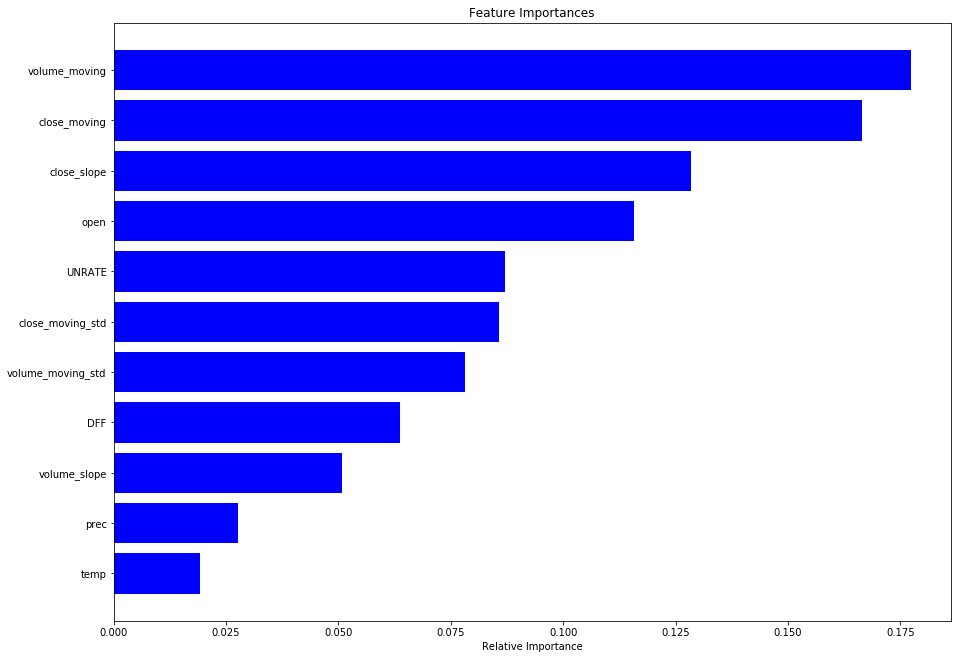

In [10]:
random_forest(x_train, x_test, y_train, y_test, colz, True, 5)

In [11]:
svm(x_train, x_test, y_train, y_test, colz)

SVM results:
SVM training acuracy=  0.6849685754189944
SVM test accuracy=  0.37083811710677383


In [12]:
perceptron(x_train, x_test, y_train, y_test, colz)

perceptron training acuracy=  0.518592877094972
perceptron test accuracy=  0.6678147722923843


In [13]:
x_train, x_test, y_train, y_test, colz = data_split(yahoo_data,'best',True)

Neural Network results:
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 9164 samples, validate on 2292 samples
Epoch 1/20
9164/9164 [==============================] - 4s 445us/sample - loss: 0.7489 - acc: 0.6839 - val_loss: 1.8657 - val_acc: 0.5480
Epoch 2/20
9164/9164 [==============================] - 3s 348us/sample - loss: 0.4600 - acc: 0.7801 - val_loss: 3.0147 - val_acc: 0.5332
Epoch 3/20
9164/9164 [==============================] - 3s 340us/sample - loss: 0.4021 - acc: 0.8217 - val_loss: 3.2942 - val_acc: 0.5947
Epoch 4/20
9164/9164 [==============================] - 3s 326us/sample - loss: 0.3565 - acc: 0.8412 - val_loss: 3.8424 - val_acc: 0.6235
Epoch 5/20
9164/9164 [==============================] - 3s 311us/sample - loss: 0.3266 - acc: 0.8627 - val_loss: 4.1837 - val_acc: 0.6222
Epoch 6/20
9164/9164 [==============================] - 3s 311us/sample - loss: 0.2967 - acc: 0.8789 - val_loss: 4.6501 

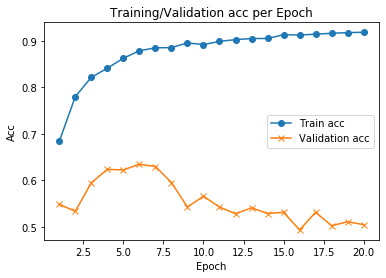

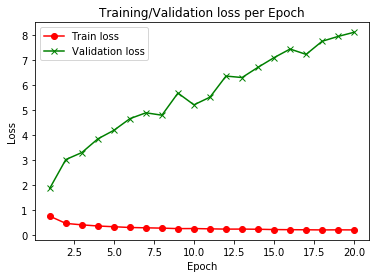

In [14]:
neural_netter(x_train, x_test, y_train, y_test, colz)

## -------------PRACTICE-------------
1.

<a id='55'></a>
# Weekly Readings/Videos

https://blog.trinket.io/why-python/
    
https://towardsdatascience.com/top-16-python-applications-in-real-world-a0404111ac23

<a id='56'></a>
# Extra Practice